In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [5]:
base_model = VGG16(weights = "imagenet", include_top=False, input_shape=(32,32,3))

In [6]:
for layer in base_model.layers:
    layer.trainable = False

In [7]:
x = Flatten()(base_model.output)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(10, activation="softmax")(x)

In [8]:
model = Model(inputs=base_model.input, outputs=x)

In [9]:
model.compile(optimizer=Adam(), loss = "categorical_crossentropy", metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs = 1, batch_size=64, validation_data=(x_test,y_test))

782/782 [==============================] - 234s 299ms/step - loss: 1.5877 - accuracy: 0.4410 - val_loss: 1.3173 - val_accuracy: 0.5389


In [11]:
for layer in base_model.layers:
    layer.trainable = True

In [12]:
model.compile(optimizer=Adam(), loss = "categorical_crossentropy", metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs = 1, batch_size=64, validation_data=(x_test,y_test))

782/782 [==============================] - 2167s 3s/step - loss: 1.9625 - accuracy: 0.2113 - val_loss: 1.7214 - val_accuracy: 0.3452


In [15]:
t_loss, t_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 37s 117ms/step - loss: 1.7214 - accuracy: 0.3452


In [16]:
print(t_loss)
print(t_acc)

1.7214187383651733
0.3452000021934509


In [17]:
pred = model.predict(x_test)

313/313 [==============================] - 34s 106ms/step


1/1 [==============================] - 0s 34ms/step


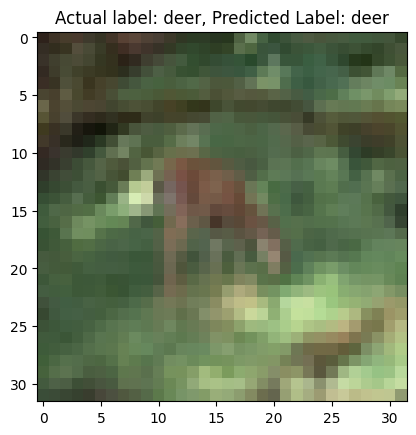

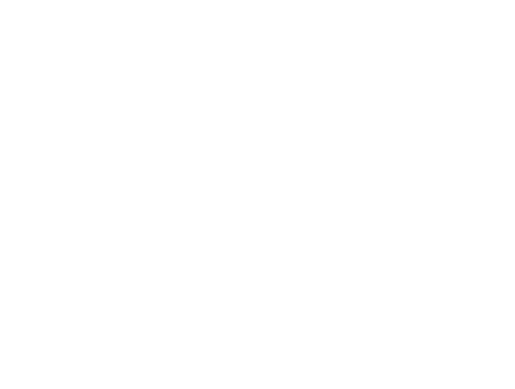

In [25]:
n = 1
random_choices = np.random.choice(x_test.shape[0], n, replace = False)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i,idx in enumerate(random_choices):
    img = x_test[idx]
    label = np.argmax(y_test[idx])

    pred = model.predict(np.expand_dims(img, axis=0))
    pred_l = np.argmax(pred)

    plt.title(f"Actual label: {class_names[label]}, Predicted Label: {class_names[pred_l]}")
    plt.imshow(img)
    plt.show()
    plt.axis('off')